In [8]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
faces = fetch_olivetti_faces()

In [5]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [7]:
faces.images.shape

(400, 64, 64)

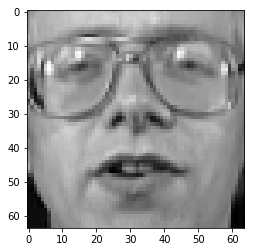

In [13]:
plt.imshow(faces.images[10], cmap='gray')

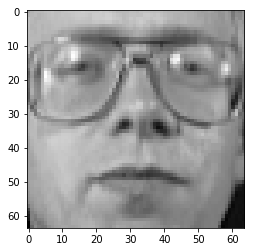

In [14]:
plt.imshow(faces.images[11], cmap='gray')

* One face from each class

In [21]:
testX = faces.data[np.array(list(range(1,400,10))),:]

In [22]:
feature_data = faces.data[:,:2048]

In [82]:
df = pd.DataFrame(feature_data)

In [85]:
feature_data = df.drop(list(range(1,400,10))).values

In [87]:
target_data = faces.data[:,2048:]

In [88]:
df = pd.DataFrame(target_data)

In [89]:
target_data = df.drop(list(range(1,400,10))).values

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
dt = DecisionTreeRegressor()

In [115]:
dt.fit(feature_data,target_data)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [116]:
testX.shape

(40, 4096)

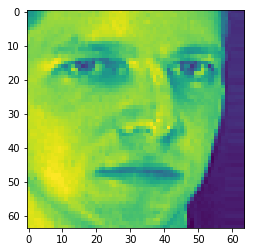

In [117]:
plt.imshow(testX[0].reshape(64,64))

In [118]:
pred = dt.predict(testX[:,:2048][1:2])

In [119]:
pred.shape

(1, 2048)

In [120]:
res = np.append(testX[:,:2048][1:2],pred)

In [121]:
res.shape

(4096,)

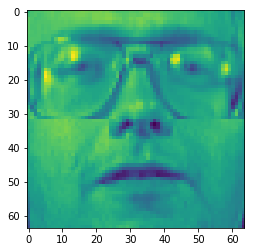

In [122]:
plt.imshow(res.reshape(64,64))